# Problem Set 3

**Experimental Uncertainties and Error Propagation**

CHEM 114

Shimon Weiss

**Due Monday, April 26th**

---

## Import dependencies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit
from lmfit import Model, report_fit
from uncertainties import ufloat

from sympy import init_printing
init_printing()  # beautiful maths

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

## Problem 1

Compute the following dimensionless quantity and find the correct error bars (pay attention to the order of operations indicated by the
brackets):

$$[(0.0045 \pm 0.0005) + (0.3 \pm 0.9)] / (1.5 \pm 0.1) = ?$$

- Write out eqation(s) used for error propagation in a markdown cell with $\LaTeX$ (see [cheatsheet](https://wch.github.io/latexsheet/latexsheet.pdf))
- pretty print solution, see `uncertainties` [documentation](https://uncertainties-python-package.readthedocs.io/_/downloads/en/stable/pdf/)
for examples

---


---

## Problem 2


Report the following numerical distance correctly, with error
bars $$X+Y$$ where $X = 110.125 \pm 0.003$ m and $Y = 85.6 \pm 0.2$ m

---

---
## Problem 3

Express the following result in proper rounded form, with suitable error bars: 

mass $ = 19.1234$ g with uncertainty $0.6789$ g.

---

---
## Problem 4

Your experiment yielded the following measurement:

$(4.1234 \pm 0.4321)$ Joules

Report this number with proper error bars and appropriate signicant figures.

---

---
## Problem 5

How many signicant gures are there in each of the following expressions?
- $0.00082$ s

- $0.14800$ psi

- $6.24 \times 10^6$ l

- $-754.090 \times 10^{-27}$ J

- $50$ cm

- $50$ m

---

---

## Problem 6

You measure the length of an object with a ruler with smallest division of 1 mm. 

You measure the length 5 times with results in mm, estimating the last digit: 

$123.4, 123.5, 124.6, 123.7, 123.8$ mm 

- What is the average length and the uncertainty in length?

---


---
## Problem 7
The uncertainty in  digital measurements can be taken to the last digit. 
Report the uncertainty of the measurements below:
- A digital voltmeter reads voltages to the nearest thousandth of a volt. 
What will be its percent uncertainty in measuring a voltage of approximately $3$ V?
- A digital balance reads masses to the nearest hundredth of a gram. 
What will be its percent uncertainty in measuring a mass of approximately $6$ g? 

---

---

## Problem 8

The Richter magnitude of an earthquake is determined
from the logarithm of the amplitude of waves 
recorded by seismographs 
(adjustments are included to compensate for the
variation in the distance between the various seismographs and the epicenter of the earthquake). The formula is defined as:

$$M_L = log_{10}(A / A_0(\delta))$$

where $A$ is the maximum excursion of the 
Wood-Anderson seismograph, the
empirical function $A_0$ depends only on the
epicentral distance of the station, $\delta$. 
Both $A$ and $\delta$ are prone to measurement error. 

Write an expression for the uncertainty in $M_L$ 
due to errors in $A$ and $\delta$
- Write the propagation error formula for $M_L$, 
    (this can be done in either $\LaTeX$ or `sympy`)
- use the [`sympy`](https://docs.sympy.org/latest/index.html) module to solve for the uncertainty.
  - you will need to import each function from the `sympy` package e.g. `from sympy import Eq, print_latex`
  - useful examples/tutorial can be found in the 
  [iPython cookbook](https://github.com/ipython-books/cookbook-2nd-code/tree/master/chapter15_symbolic)
- print the solution in $\LaTeX$ using `print_latex()`
    - optional: you can check that the output works in a markdown cell
    >Note that Microsoft 365 users can now write equations with 
    [$\LaTeX$ in Word](https://support.microsoft.com/en-us/office/linear-format-equations-using-unicodemath-and-latex-in-word-2e00618d-b1fd-49d8-8cb4-8d17f25754f8). 
     If you do not have access to Microsoft 365, it may also be possible to install 
     a $\LaTeX$ plugin.
     Typing your equations will make your life MUCH easier, especially now that you know how to 
     generate them with `sympy`!
---

---
## Problem 9

After measuring the speed of sound $u$ several times, a student concludes that the standard
deviation $\sigma_u$ of her measurements is $\sigma_u = 10$ m/s. 
If all uncertainties were truly random,
she could get any desired precision by
making enough measurements and averaging.

Use `sympy` to calculate the following:
>HINT: you will need to import the functions from `sympy` as needed
- How many measurements are needed to give a final uncertainty of 3 m/s?
    - define a function for $\delta$ and save the solution in a dictionary
        using `solve(your_function, your_variable, dict=True)`
    - evaluate the expression using the syntax `your_dict[value].values()`
    - create a dictionary called `subs` that contains the parameters as keys 
        and the vaules as the numbers you want to evaluate the expression, e.g. 
        `subs = {'param1': 0, 'param2': 1}`
        - finally, evaluate the expression using the dictionary you just created with
            `solve(your_dict.subs(subs), your_variable, dict=True)`
- How many for a final uncertainty of only $\pm 0.5$ m/s?

---

---
## Problem 10

| h (m) all +\- 0.05 | v^2 (m^2/s^2) |
|--------------------|---------------|
| 0.4                | 7  +/- 3        |
| 0.8                | 17 +/- 3        |
| 1.4                | 25 +/- 3        |
| 2.0                | 38 +/- 4        |
| 2.6                | 45 +/- 5        |
| 3.4                | 62 +/- 5        |
| 3.8                | 72 +/- 6        |

Use the table to plot the following:

- Make a plot of $v^2$ against $h$, including vertical and horizontal error bars. 
- The slope of your graph should be $2 g$. 
    Use `lmfit` to calculate the slope
- plot the residuals and and your fit using the `.plot()` method of `lmfit`
    - include the error in y
    - label axes appropriatly - ALWAYS include units!
- create a dictionary of the parameter results using `your_result.params.valuesdict()`
- create another plot of your fitted data using `matplotlib.pyplot` 
    - plot the best fit line and fit uncertainty using `plt.errorbars()`
    - plot the raw data (you don't have to include the error - it is much larger than the fit error)
    - make sure you adjust the `capsize` so that the errorbars are visible
    >HINT: you can access the fit uncertainty with `your_result.eval_uncertainty()`
    - print the slope and its error on the graph using `plt.text()` 
    >HINT: you can access these values with the syntax 
      `your_result.params['your_param'].value` and `your_result.params['your_param'].stderr`
    - finally save a high resolution figure using `plt.savefig('my_figure', dpi=200)`
- Are your results consistent with the accepted value $2g = 19.6~m^2/s^2$?
---

---

Note that to create a plot similar to the `lmfit` method, 
you would have to make a figure with subplots. 

The residuals can be accessed as,

In [31]:
res = result.residual

In [32]:
# to create a figure with varying sized subplots, you would need to use `gridspec`
# however, the example below is simple and produces evenly sized subplots 
#from matplotlib import gridspec

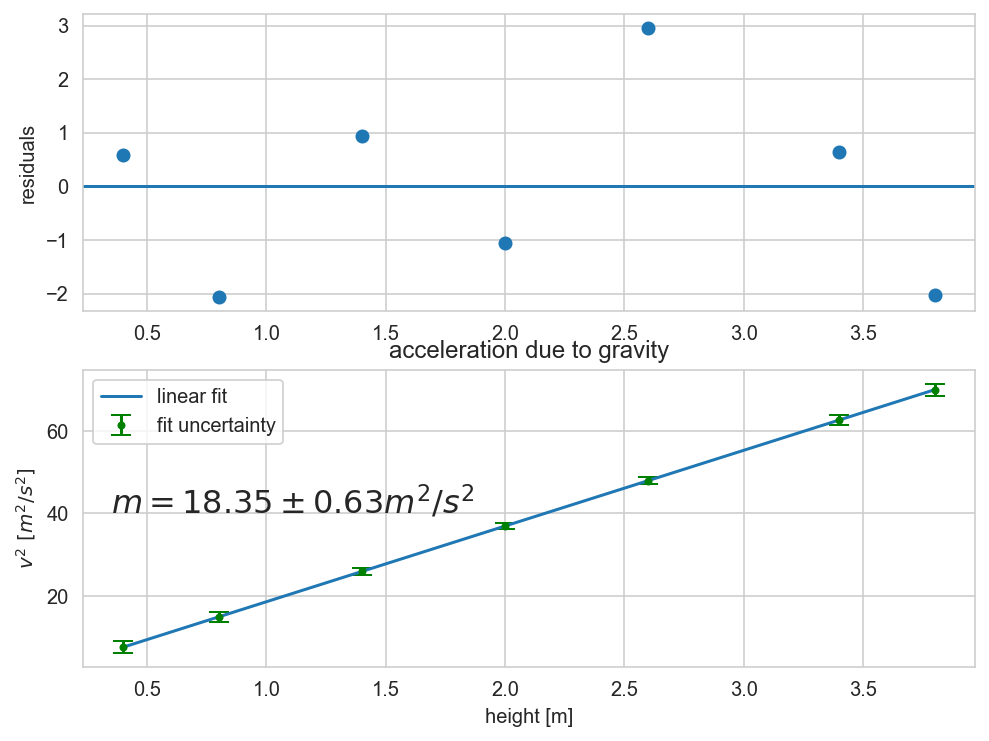

In [33]:
fig, ax = plt.subplots(2, 1, figsize = (8, 6))

ax[0].plot(h, res, 'o')
ax[0].axhline(0)
ax[0].set_ylabel('residuals')
ax[1].errorbar(h, result.best_fit, yerr=fit_uncertainty, markersize='3', fmt='go', capsize=5, label='fit uncertainty')
ax[1].plot(h, result.best_fit, label='linear fit')
ax[1].set_xlabel('height [m]')
ax[1].set_ylabel('$v^2~[m^2/s^2]$')
ax[1].set_title('acceleration due to gravity')
ax[1].text(0.35, 40, f'$m = {slope: .2f} \pm {err_slope: .2f} m^2/s^2$', fontsize=16)
ax[1].legend()
fig.savefig('gravity', dpi=400);